# Clasificación Bayes

A diferencia de los problemas de regresión (predicción) un número continuo, a diferencia de la clasificación donde obtenemos un número discreto o un texto que se puede representar como un número discreto o entero  

## Dataset

In [15]:
from sklearn.datasets import make_moons

In [16]:
X, y = make_moons(n_samples=500, noise=0.3, random_state=0) # Noise es la distorsión de los datos

In [17]:
import numpy as np 
nuevo_rango = (0,5)
X = np.interp(X, (X.min(), X.max()), nuevo_rango)
 

In [18]:
import pandas as pd

In [19]:
df = pd.DataFrame(X, columns=['feature_1','feature_2'])
df.head()

,feature_1,feature_2
0,2.152986,2.988742
1,1.092666,2.492617
2,2.152764,1.997397
3,4.010536,1.710281
4,4.427614,0.817460


In [20]:
df = pd.DataFrame(X, columns=['feature_1','feature_2'])
df['label']= y # Etiquetas o clases 
df.head()

,feature_1,feature_2,label
0,2.152986,2.988742,0
1,1.092666,2.492617,1
2,2.152764,1.997397,1
3,4.010536,1.710281,1
4,4.427614,0.817460,1


In [21]:
# Podemos ver que se trata de una clasificación binaria, pues la variable objetivo o Y es cero o uno

import matplotlib.pyplot as plt


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


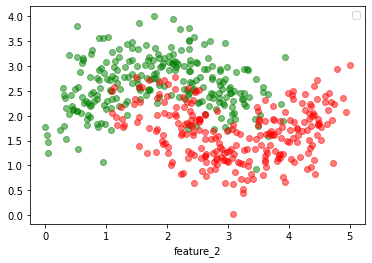

In [22]:
# Vamos a graficar los datos de una forma que se pueda diferenciar a qué clases pertenece cada dato (hay dos clases pues se 
# trata de una clasificación binaria )


df_green = df[df['label'] == 0]
df_red = df[df['label'] == 1]

plt.figure()
plt.scatter(df_green['feature_1'], df_green['feature_2'], alpha=0.5, color='green')
plt.scatter(df_red['feature_1'], df_red['feature_2'], alpha=0.5, color='red')
plt.xlabel('feature_1')
plt.xlabel('feature_2')
plt.legend()
plt.show()